In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
# Optimizador
from tensorflow.keras.optimizers import Adam

In [2]:
# asegurar que los resultados sean "reproducibles"
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

In [3]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

Normalizacion

In [4]:
def crear_normalizador(datos):
    normalizer = Normalization(axis=-1)
    normalizer.adapt(np.array(datos))
    return normalizer

In [5]:
normalizador = crear_normalizador(X_train)

Creación Red Neuronal

In [6]:
def crear_nn_regresion(norm):
    model = Sequential([
        norm,
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=Adam(0.001))
    return model

In [7]:
nn = crear_nn_regresion(normalizador)

Entrenamiento del modelo

In [8]:
history = nn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

Evaluar el rendimiento del modelo

In [9]:
nn.evaluate(X_test, y_test, verbose=0)

13988.83203125

In [18]:
# Creación de predicciones
y_pred = nn.predict(X_test).flatten()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [23]:
X_test

,CODIGO,SEMESTRE,PERIODO,GENERO_F,GENERO_M,ESTUDIANTE_Primiparo,ESTUDIANTE_Regular,FACULTAD_Facultad de Artes,FACULTAD_Facultad de Ciencias Agrarias,FACULTAD_Facultad de Ciencias Contables Económicas y Administrativas,...,PROGRAMA_Licenciatura en Educación Básica Primaria,PROGRAMA_Licenciatura en Lenguas Modernas con Énfasis en Ingles y Francés – Santander de Quilichao,PROGRAMA_Licenciatura en Lenguas Modernas con Énfasis en Inglés y Francés,PROGRAMA_Licenciatura en Matemáticas,PROGRAMA_Matemáticas,PROGRAMA_Medicina,SEDE_POPAYAN,SEDE_SANTANDER DE QUILICHAO,JORNADA_DIURNO,JORNADA_NOCTURNO
0,105923020847,2,2023.2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,105923020848,2,2023.2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,105923020849,2,2023.2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,105923020850,2,2023.2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,105923020851,2,2023.2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,101823021278,1,2023.2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
433,100020230238,0,2023.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
434,100020230239,6,2023.2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
435,100020230240,5,2023.2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
len(y_test)
len(y_pred)

437

In [27]:
y_pred

array([ 1.04358137e-01,  1.04358137e-01,  1.04358137e-01,  2.16169748e-02,
        1.04358137e-01,  7.08641589e-01,  7.27955401e-01,  6.87584758e-01,
        8.57631937e-02,  4.77780923e-02,  8.57631937e-02,  6.26178438e+04,
        6.26178438e+04,  6.26178203e+04,  6.26178438e+04,  6.26178438e+04,
        6.26178203e+04,  6.26178438e+04,  6.26178438e+04,  6.26178438e+04,
        6.26178438e+04,  6.26178438e+04,  6.26178438e+04,  6.26178438e+04,
        6.26178008e+04,  6.26178438e+04,  6.26178438e+04,  6.26178438e+04,
        6.26178203e+04,  6.26178203e+04,  6.26178438e+04,  6.26178320e+04,
        6.26178438e+04,  6.26178438e+04,  6.26178203e+04,  6.26178203e+04,
        6.26178438e+04,  6.26178438e+04,  6.26177539e+04,  6.26178203e+04,
        6.26178438e+04,  6.26178203e+04,  6.26178203e+04,  6.26178203e+04,
        6.26178438e+04,  6.26178203e+04,  6.26178438e+04,  6.26178438e+04,
        6.26178438e+04,  6.26178320e+04,  6.26178438e+04,  6.26178203e+04,
        6.26178320e+04,  

In [35]:
y_test

,ESTADO_ACTIVO,ESTADO_Balanceado Primer Semestre,ESTADO_INACTIVO,ESTADO_INACTIVO CANCELA SEMESTRE,ESTADO_INACTIVO DOS PROGRAMAS
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
432,0.0,0.0,1.0,0.0,0.0
433,1.0,0.0,0.0,0.0,0.0
434,1.0,0.0,0.0,0.0,0.0
435,1.0,0.0,0.0,0.0,0.0


ValueError: x and y must be the same size

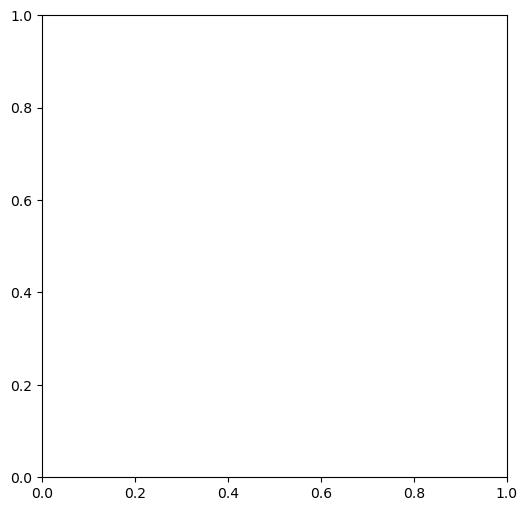

In [36]:
y_test_vector = y_test.values.ravel()  # O .to_numpy().ravel()

plt.figure(figsize=(6,6))
plt.scatter(y_test_vector, y_pred)
plt.xlabel('Real [DESERCION ESTUDIANTIL]')
plt.ylabel('Predicción [DESERCION ESTUDIANTIL]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, 'k--')
plt.title('Predicción vs Real')
plt.grid(True)
plt.tight_layout()
plt.show()
